In [1]:
#2024-11-11
#box plot

import pandas as pd

s = pd.Series([1,2,3,4,5,6,7,8,9,10,11,1200])
print(s.quantile([.25,.5,.75]))
s.mean(), s.median()

0.25    3.75
0.50    6.50
0.75    9.25
dtype: float64


(np.float64(105.5), np.float64(6.5))

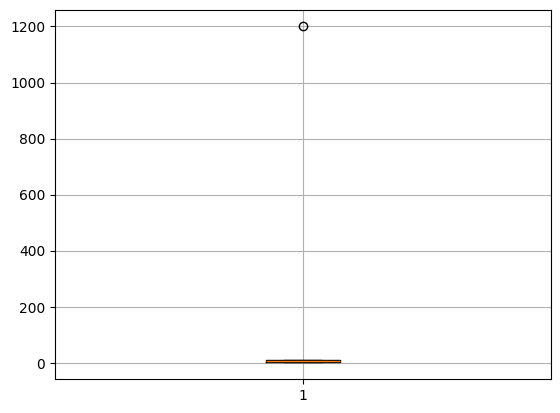

In [2]:
import matplotlib.pyplot as plt

plt.boxplot(s)
plt.grid()

In [13]:
#mini proyecto de analisis financiero

# SPY: indice syp 500
# IYW: indice de bursatil de  empresas de tecnologia gringa
# VT: Indice de empresas a nivel mundial que esten en la vanguardia
# DBA: Inversiones de oferta y demanda de productos agricolas a nivel mundial 
# TLT: indice de los bonos estado unidenses
# PDBC: indice de oferta y demanda de materias primas y sus precios
# IAU: precio de oro
# GS10 la reserva federal

from datetime import date
import pandas as pd
import matplotlib.pyplot as ptl
import pandas_datareader as pdr

#data = pdr('^DJI', 'stooq')
data = pdr.get_data_stooq('IAU', date(2020,1,1), date.today())
data

def get_stock(ticker ,start, end):
    data = pdr.get_data_yahoo(ticker, start, end)
    data.insert(0,'Ticker', ticker)
    return data

ModuleNotFoundError: No module named 'distutils'

In [ ]:
ini = date(2020,1,1)
fin = date.today()

SPY = get_stock("SPY", ini, fin)
SPY.info()

In [ ]:
SPY.head()

In [ ]:
SPY.pivot(columns='Ticker', values = "close").head() #es como una tabla dinamica

In [ ]:
SPY['year'] = SPY.index.year
SPY.head()

In [ ]:
SPY['year'].unique()

In [ ]:
stock = pd.concat([SPY, IYW, VT, DBA, TLT, PDBC, IAU], axis = 1, join='outer')#outer para anadir un dato en particular en comun en este caso la fecha
stock.head()

In [ ]:
ptl.style.use('ggplot')
stock.plot(figsize = (20,10))
plt.show()

In [ ]:
covid = stock.loc['2020-01-02': '2021-01-02']
covid = stock['2020-01-02': '2021-01-02']
covid.tail()

In [ ]:
x = covid.index.values#fechas
s_y = covid[['SPY']].values#doble corchete devuelve dataframe


In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1,3,figsize=(15,5))
axs[0].plot(x,s_y)
fig.suptitle('Covid 19')
plt.show()

In [ ]:
ticker = 'PDBC'
ini = date(2020,1,1)
fin = date.today()
df2 = get_stock(ticker, ini, fin)
df2.head()


In [ ]:
df2.drop(['Ticker','High','Low','Open'], axis =1, inplace= True)
df2.head()

In [ ]:
x = df2.index
y=df2['Volume']

plt.figure(figsize = (15,3))
plt.bar(x,y)
plt.show()


In [ ]:
x = df2